# Lesson 6

In [1]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import model_selection
import numpy as np

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
X, y = load_diabetes(return_X_y=True)

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [5]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются 
    # с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [6]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [7]:
def bias(y, z):
    return (y - z)

In [8]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [9]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')
    
    return mean_squared_error(y_test, test_prediction)
    

In [10]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [11]:
# Для сравнения везде выставим одну скорость обучения

eta = 0.1

# А для глубины и количества деревьев переберем несколько параметров: 
# Глубина 3, 5, 7
# Количество деревьев 10, 25, 50, 100 


In [12]:
# Создадим списки для хранения логов ошибок

n_trees_10_error_log_test = []
n_trees_25_error_log_test = []
n_trees_50_error_log_test = []
n_trees_100_error_log_test = []

In [13]:
# Число деревьев в ансамбле
n_trees = 10
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [14]:
n_trees_10_error_log_test.append(evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta))

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 5706.5142713269815
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 7112.156624407098


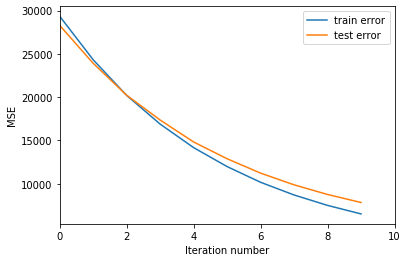

In [15]:
get_error_plot(n_trees, train_errors, test_errors)

In [16]:
# Максимальная глубина деревьев
max_depth = 5

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [17]:
n_trees_10_error_log_test.append(evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta))

Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 4812.937064920035
Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 7109.959984631714


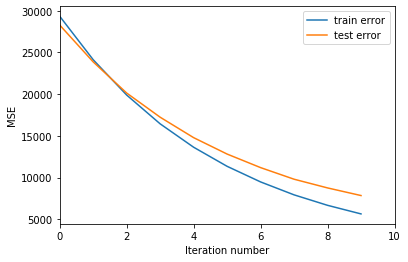

In [18]:
get_error_plot(n_trees, train_errors, test_errors)

In [19]:
# Максимальная глубина деревьев
max_depth = 7

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)


In [20]:
n_trees_10_error_log_test.append(evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta))

Ошибка алгоритма из 10 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 4105.76620814049
Ошибка алгоритма из 10 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 7389.614021186955


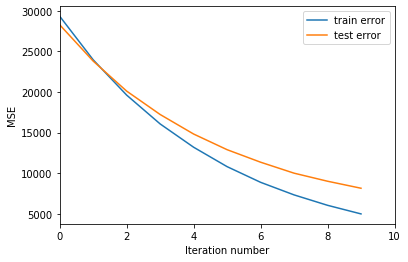

In [21]:
get_error_plot(n_trees, train_errors, test_errors)

In [22]:
# Теперь изменим количество деревьев в ансамбле
n_trees = 25
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [23]:
n_trees_25_error_log_test.append(evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta))

Ошибка алгоритма из 25 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 2027.307330307047
Ошибка алгоритма из 25 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3748.7175054457684


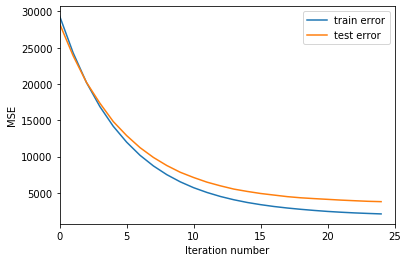

In [24]:
get_error_plot(n_trees, train_errors, test_errors)

In [25]:
# Максимальная глубина деревьев
max_depth = 5

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [26]:
n_trees_25_error_log_test.append(evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta))

Ошибка алгоритма из 25 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 961.744397120226
Ошибка алгоритма из 25 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 3824.985405741003


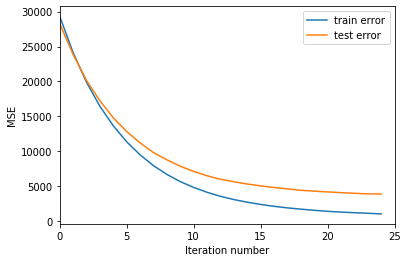

In [27]:
get_error_plot(n_trees, train_errors, test_errors)

In [28]:
# Максимальная глубина деревьев
max_depth = 7

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [29]:
n_trees_25_error_log_test.append(evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta))

Ошибка алгоритма из 25 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 291.8618464697088
Ошибка алгоритма из 25 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 4095.723843756529


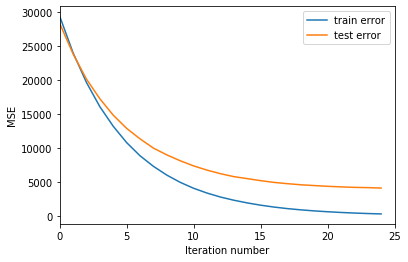

In [30]:
get_error_plot(n_trees, train_errors, test_errors)

In [31]:
# Теперь изменим количество деревьев в ансамбле
n_trees = 50
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [32]:
n_trees_50_error_log_test.append(evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta))

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 1442.6878798583755
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3335.4627517518807


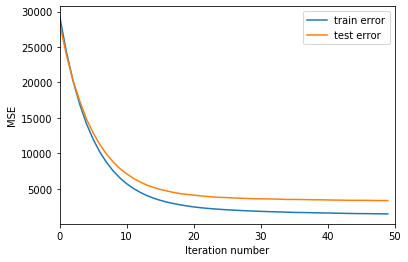

In [33]:
get_error_plot(n_trees, train_errors, test_errors)

In [34]:
# Максимальная глубина деревьев
max_depth = 5

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [35]:
n_trees_50_error_log_test.append(evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta))

Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 324.502779851464
Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 3522.464124942554


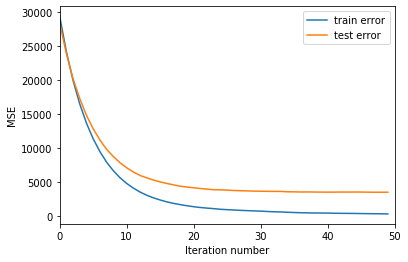

In [36]:
get_error_plot(n_trees, train_errors, test_errors)

In [37]:
# Максимальная глубина деревьев
max_depth = 7

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)


In [38]:
n_trees_50_error_log_test.append(evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta))

Ошибка алгоритма из 50 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 20.371776545814374
Ошибка алгоритма из 50 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 3949.3224349412335


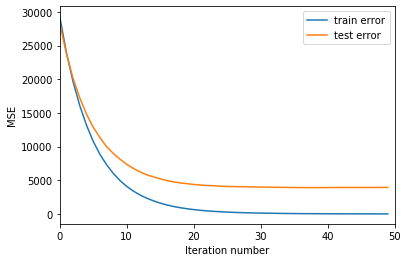

In [39]:
get_error_plot(n_trees, train_errors, test_errors)

In [40]:
# Теперь изменим количество деревьев в ансамбле
n_trees = 100
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [41]:
n_trees_100_error_log_test.append(evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta))

Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 948.0632424652381
Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3279.200959320645


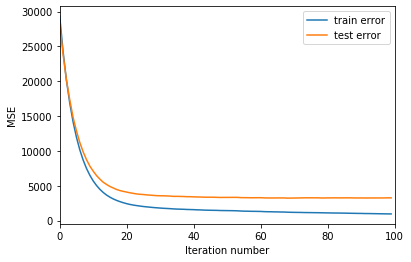

In [42]:
get_error_plot(n_trees, train_errors, test_errors)

In [43]:
# Максимальная глубина деревьев
max_depth = 5

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [44]:
n_trees_100_error_log_test.append(evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta))

Ошибка алгоритма из 100 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 90.98379352822053
Ошибка алгоритма из 100 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 3479.8526121781088


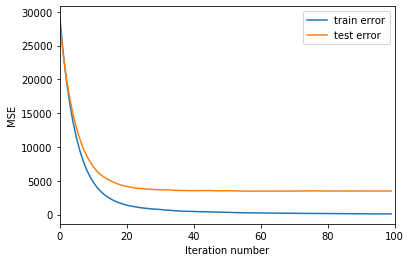

In [45]:
get_error_plot(n_trees, train_errors, test_errors)

In [46]:
# Максимальная глубина деревьев
max_depth = 7

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [47]:
n_trees_100_error_log_test.append(evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta))

Ошибка алгоритма из 100 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 1.7090560053872057
Ошибка алгоритма из 100 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 3974.264564316666


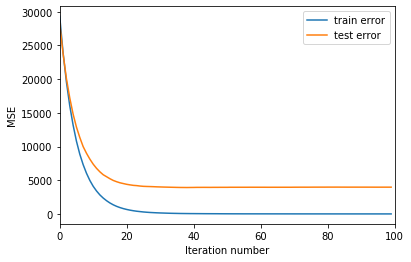

In [48]:
get_error_plot(n_trees, train_errors, test_errors)

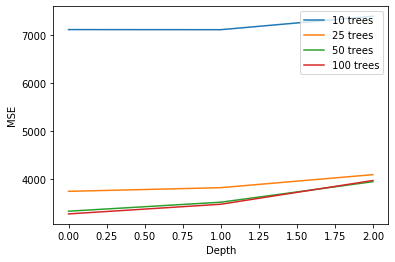

In [51]:
plt.xlabel('Depth')
plt.ylabel('MSE')
plt.plot(n_trees_10_error_log_test, label='10 trees')
plt.plot(n_trees_25_error_log_test, label='25 trees')
plt.plot(n_trees_50_error_log_test, label='50 trees')
plt.plot(n_trees_100_error_log_test, label='100 trees')
plt.legend(loc='upper right')
plt.show()

In [ ]:
depth_3 = []
depth_5 = []
depth_7 = []

n_trees_10_error_log_test[0]  
    
    

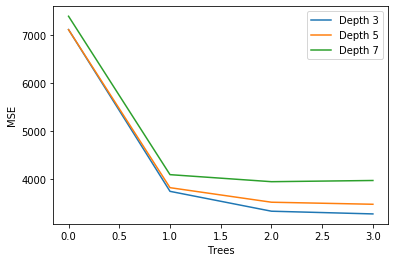

In [54]:
plt.xlabel('Trees')
plt.ylabel('MSE')
plt.plot((n_trees_10_error_log_test[0], n_trees_25_error_log_test[0], n_trees_50_error_log_test[0],n_trees_100_error_log_test[0]), label='Depth 3')
plt.plot((n_trees_10_error_log_test[1], n_trees_25_error_log_test[1], n_trees_50_error_log_test[1],n_trees_100_error_log_test[1]), label='Depth 5')
plt.plot((n_trees_10_error_log_test[2], n_trees_25_error_log_test[2], n_trees_50_error_log_test[2],n_trees_100_error_log_test[2]), label='Depth 7')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Модель очень чувствительна к изменению настроек и очень легко переобучается